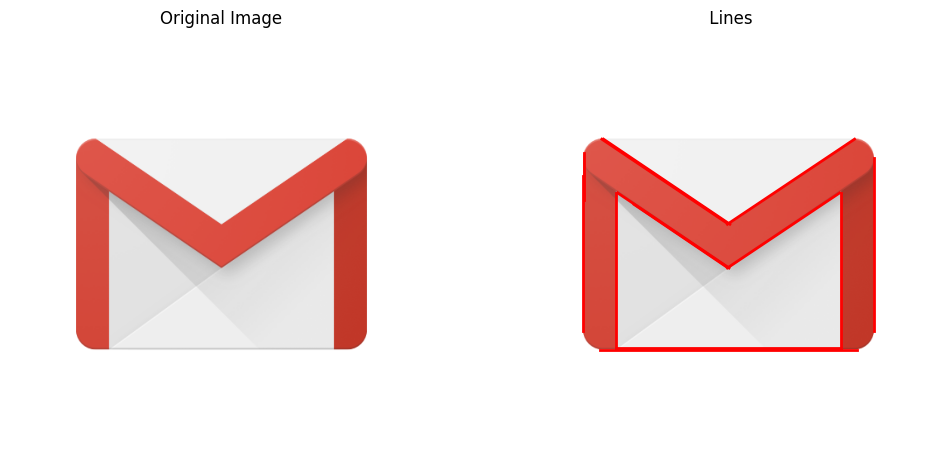

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path ='/content/mail imag.png'
src = cv2.imread(image_path)
if src is None:
    raise FileNotFoundError(f"File '{image_path}' does not exist. Please check the file path and try again.")
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(src_gray, 50, 200)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=50, maxLineGap=10)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title(' Lines')
plt.axis('off')

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        plt.plot([x1, x2], [y1, y2], 'r-', linewidth=2)

plt.show()


Saving images1.jpeg to images1 (9).jpeg
Image 'images1 (9).jpeg' uploaded successfully.


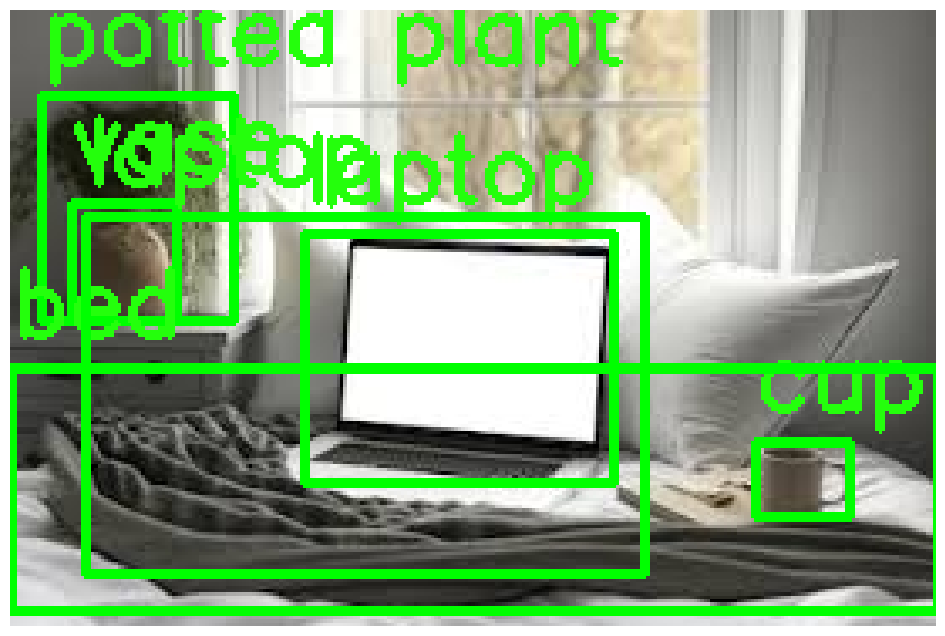

In [ ]:

import cv2
import numpy as np
import torch
from torchvision import models
import torchvision.transforms as T
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()


image_path = list(uploaded.keys())[0]


if image_path:
    print(f"Image '{image_path}' uploaded successfully.")
else:
    print("Error: No image was uploaded. Please try again.")


model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()


def detect_objects(image_path):

    image = cv2.imread(image_path)

    if image is None:
        print("Error: Image not loaded. Check the file path or ensure the file exists.")
        return


    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image_rgb)

    with torch.no_grad():
        output = model([image_tensor])


    boxes = output[0]['boxes'].numpy()
    labels = output[0]['labels'].numpy()
    scores = output[0]['scores'].numpy()


    coco_labels = [
        '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
        'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
        'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
        'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
        'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
        'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
        'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet',
        'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'shoes', 'microwave', 'oven', 'toaster', 'sink',
        'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]


    detection_threshold = 0.7

    for i in range(len(boxes)):
        if scores[i] > detection_threshold:

            (x1, y1, x2, y2) = boxes[i].astype(int)
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)


            label = coco_labels[labels[i]]
            cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)


    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


if image_path:
    detect_objects(image_path)


Saving images1.jpeg to images1 (10).jpeg
Image 'images1 (10).jpeg' uploaded successfully.
 Faster score 69%


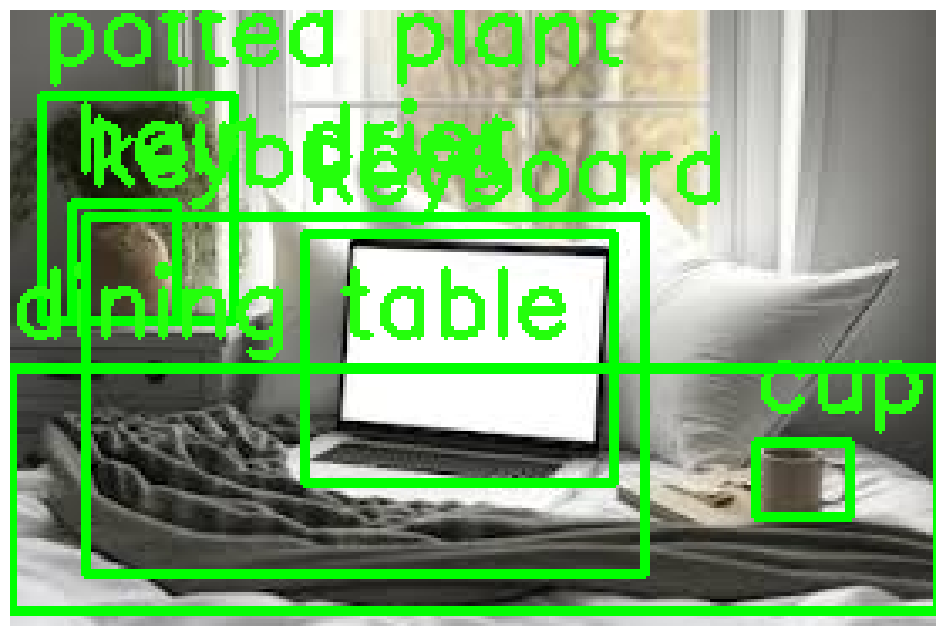

In [ ]:

import cv2
import numpy as np
import torch
from torchvision import models
import torchvision.transforms as T
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()


image_path = list(uploaded.keys())[0]


if image_path:
    print(f"Image '{image_path}' uploaded successfully.")
else:
    print("Error: No image was uploaded. Please try again.")


model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()


def detect_objects(image_path):

    image = cv2.imread(image_path)

    if image is None:
        print("Error: Image not loaded. Check the file path or ensure the file exists.")
        return


    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image_rgb)

    with torch.no_grad():
        output = model([image_tensor])


    boxes = output[0]['boxes'].numpy()
    labels = output[0]['labels'].numpy()
    scores = output[0]['scores'].numpy()


    coco_labels = [
        '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
        'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
        'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
        'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
        'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
        'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
        'donut', 'cake', 'chair', 'couch', 'potted plant',  'dining table',  'N/A', 'toilet',
        'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'shoes', 'microwave', 'oven', 'toaster', 'sink',
        'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]


    detection_threshold = 0.7
    accuracy =("detection")
    for i in range(len(boxes)):
        if scores[i] > detection_threshold:

            (x1, y1, x2, y2) = boxes[i].astype(int)
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)


            label = coco_labels[labels[i]]
            cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    Print("Fast score:")
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


if image_path:
    detect_objects(image_path)


Saving dog.jpg to dog.jpg
Image 'dog.jpg' uploaded successfully.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 91.0MB/s]


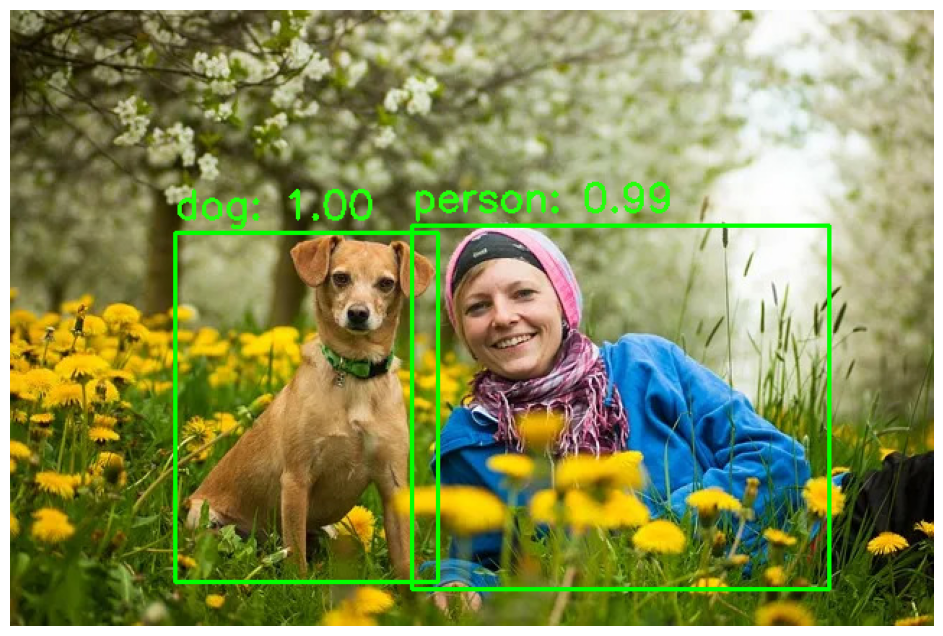

In [1]:
import cv2
import numpy as np
import torch
from torchvision import models
import torchvision.transforms as T
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

# Get the uploaded image path
image_path = list(uploaded.keys())[0]

# Check if the image was uploaded
if image_path:
    print(f"Image '{image_path}' uploaded successfully.")
else:
    print("Error: No image was uploaded. Please try again.")

# Load the pre-trained Faster R-CNN model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

def detect_objects(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not loaded. Check the file path or ensure the file exists.")
        return

    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Transform the image to tensor
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image_rgb)

    # Perform inference
    with torch.no_grad():
        output = model([image_tensor])

    # Extract bounding boxes, labels, and scores
    boxes = output[0]['boxes'].numpy()
    labels = output[0]['labels'].numpy()
    scores = output[0]['scores'].numpy()

    # COCO labels
    coco_labels = [
        '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
        'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
        'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
        'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
        'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
        'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
        'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet',
        'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'shoes', 'microwave', 'oven', 'toaster', 'sink',
        'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]

    # Detection threshold
    detection_threshold = 0.7

    # Draw bounding boxes and labels
    for i in range(len(boxes)):
        if scores[i] > detection_threshold:
            (x1, y1, x2, y2) = boxes[i].astype(int)
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Prepare label text with score
            label = f"{coco_labels[labels[i]]}: {scores[i]:.2f}"
            cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Display the image
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Run object detection on the uploaded image
if image_path:
    detect_objects(image_path)
